# A minimal ALF run

In this bare-bones example we use the [pyALF](https://git.physik.uni-wuerzburg.de/ALF/pyALF) interface to run the canonical Hubbard model on a default configuration: a $6\times6$ square grid, with interaction strength $U=4$ and inverse temperature $\beta = 5$.  

Bellow we go through the steps for performing the simulation and outputting observables.

---

**1.** Import `Simulation` class from the `py_alf` python module, which provides the interface with ALF:

In [1]:
import os
import numpy as np
from py_alf import Simulation              # Interface with ALF

**2.** Create an instance of `Simulation`, setting parameters as desired:

In [2]:
sim = Simulation(
    "Hubbard",                             # Hamiltonian
    {                                      # Model and simulation parameters for each Simulation instance
    "Model": "Hubbard",                    # Base model
    "Lattice_type": "Square"},             # Lattice type
    alf_dir=os.getenv('ALF_DIR', './ALF'), # Directory with ALF source code. Gets it from 
                                           # environment variable ALF_DIR, if present
)

**3.** Compile ALF, downloading it first from the [ALF repository](https://git.physik.uni-wuerzburg.de:ALF) if not found locally. This may take a few minutes:

In [3]:
sim.compile()                              # Compilation needs to be performed only once

Compiling ALF... Done.


**4.** Perform the simulation as specified in `sim`:

In [4]:
sim.run()                                  # Perform the actual simulation in ALF

Prepare directory "/home/jonas/Programs/pyALF/Notebooks/ALF_data/Hubbard_Square" for Monte Carlo run.
Create new directory.
Run /home/jonas/Programs/ALF/Prog/ALF.out


**New:** Derived observables

In [5]:
def R_k(obs, back, sign, N_orb, N_tau, dtau, latt, ks=[[0., 0.]], mat=None):
    # obs.shape = (N_orb, N_orb, N_tau, latt.N)
    if mat is None:
        mat = np.identity(N_orb)
    out = 0
    for k in ks:
        n = latt.k_to_n(k)

        J1 = (obs[..., n].sum(axis=-1) * mat).sum()
        J2 = 0
        for i in latt.NNk(n):
            J2 = J2 + (obs[..., i].sum(axis=-1) * mat).sum() / len(latt.NNk(n))
        out += (1 - J2/J1)

    return out / len(ks)

In [ ]:
def E_pot_kin()

In [8]:
sim.custom_obs['R_AFM']= {
    'needs': ['Spin_eq'],
    'function': R_k,
    'kwargs': {'ks': [[np.pi, np.pi]]}
}

**New:** Check warmup and autocorrelation

In [9]:
import math
import matplotlib.pyplot as plt

Ener_scal
Kin_scal
Pot_scal
(-29.84515829081703+0j) (0.0027879331309140372-0j)
(-48.3537881641635+0j) (0.00045952479151534676-0j)
(18.508629873346464+0j) (-0.0032950327273521896+0j)


/opt/intel/oneapi/intelpython/latest/lib/python3.7/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


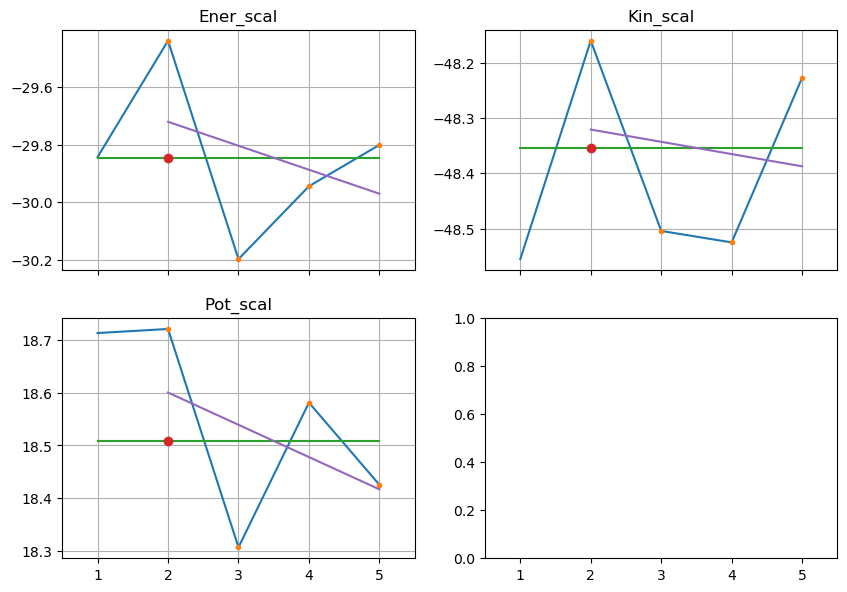

In [10]:
sim.check_warmup(['Ener_scal', 'Kin_scal', 'Pot_scal'])

Ener_scal
Kin_scal


/home/jonas/Programs/pyALF/alf_ana/check_rebin.py:114: UserWarning: Attempting to set identical bottom == top == 0.1826532567418424 results in singular transformations; automatically expanding.
  ax.set_ylim(err[:, :, 1].min(), err[:, :, 1].max())
/home/jonas/Programs/pyALF/alf_ana/check_rebin.py:114: UserWarning: Attempting to set identical bottom == top == 0.10852719105947338 results in singular transformations; automatically expanding.
  ax.set_ylim(err[:, :, 1].min(), err[:, :, 1].max())


At end of list, click 'Finish' to exit.
At end of list, click 'Finish' to exit.


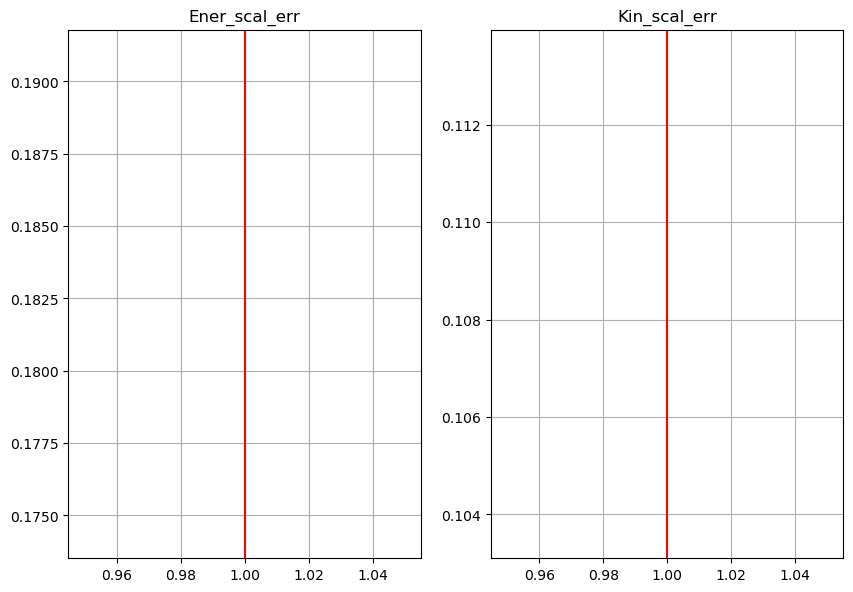

In [11]:
sim.check_rebin(['Ener_scal', 'Kin_scal'])

**5.** Perform some simple analyses:

In [12]:
sim.analysis()
#Python analysis with plain-text bins is not very robust

### Analyzing /home/jonas/Programs/pyALF/Notebooks/ALF_data/Hubbard_Square ###
/home/jonas/Programs/pyALF/Notebooks


KeyError: "Unable to open object (object 'parameters' doesn't exist)"

**6.** Store computed observables list:

In [6]:
obs = sim.get_obs()    # Dictionary for the observables

/home/jonas/Programs/pyALF/Notebooks/ALF_data/Hubbard_Square


In [ ]:
#Add alternative way of getting obs

In [7]:
obs

,continuous,ham_chem,ham_t,ham_t2,ham_tperp,ham_u,ham_u2,mz,beta,bulk,...,SpinXY_tauK,SpinXY_tauK_err,SpinXY_tauR0,SpinXY_tauR0_err,SpinXY_tau_lattice,SpinZ_tauK,SpinZ_tauK_err,SpinZ_tauR0,SpinZ_tauR0_err,SpinZ_tau_lattice
/home/jonas/Programs/pyALF/Notebooks/ALF_data/Hubbard_Square,0,0.0,1.0,1.0,1.0,4.0,4.0,1,5.0,1,...,"[[0.9171441936838334, 0.563183621135565, 0.480...","[[0.120791041341242, 0.03486247334246063, 0.04...","[0.7423786398667257, 0.6387592508452704, 0.560...","[0.001002687225205446, 0.0037135521902218727, ...","{'L1': [6.0, 0.0], 'L2': [0.0, 6.0], 'a1': [1....","[[0.8941949685095801, 0.6217229097258975, 0.54...","[[0.020996714532335668, 0.014228938578809826, ...","[0.7423773212820427, 0.6287611275052051, 0.546...","[0.0010030138218446562, 0.0012583167954307493,...","{'L1': [6.0, 0.0], 'L2': [0.0, 6.0], 'a1': [1...."


In [44]:
obs.iloc[0]

Ener_scal_sign                                                 1.000000
Ener_scal_sign_err                                             0.000000
Ener_scal0                                                   -29.845158
Ener_scal0_err                                                 0.182653
Kin_scal_sign                                                  1.000000
                                            ...                        
SpinZ_tauK            [[0.911378537639076, 0.6500126682628463, 0.562...
SpinZ_tauK_err        [[0.05617745077821667, 0.04189521729661696, 0....
SpinZ_tauR0           [0.7424621860533496, 0.6275894096503655, 0.542...
SpinZ_tauR0_err       [0.002151244316258661, 0.0026106723760444092, ...
SpinZ_tau_lattice     {'L1': [6.0, 0.0], 'L2': [0.0, 6.0], 'a1': [1....
Name: /home/jonas/Programs/pyALF/Notebooks/ALF_data/Hubbard_Square, Length: 86, dtype: object

which are available for further analyses. For instance, the internal energy of the system (and its error) is accessed by:

In [22]:
obs.iloc[0][['Ener_scal0', 'Ener_scal0_err', 'Ener_scal_sign', 'Ener_scal_sign_err']]

Ener_scal0           -29.845158
Ener_scal0_err         0.182653
Ener_scal_sign         1.000000
Ener_scal_sign_err     0.000000
Name: /home/jonas/Programs/pyALF/Notebooks/ALF_data/Hubbard_Square, dtype: object

**New:** 2dplot on bravais lattice

In [1]:
from alf_ana.lattice import Lattice
import matplotlib.pyplot as plt
import matplotlib as mpl

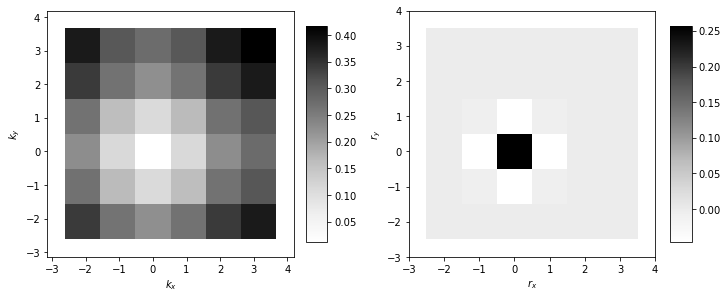

In [42]:
latt = Lattice(obs.iloc[0].Den_eq_lattice)
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(10, 5))
dat = obs.iloc[0].Den_eqK[0, 0]
cmap = mpl.cm.ScalarMappable(
    mpl.colors.Normalize(
        vmin=dat.min(), vmax=dat.max()),
    mpl.cm.Greys)
latt.plot_k(ax[0], dat, cmap)
fig.colorbar(cmap, ax=ax[0], shrink=0.6)

dat = obs.iloc[0].Den_eqR[0, 0]
cmap = mpl.cm.ScalarMappable(
    mpl.colors.Normalize(
        vmin=dat.min(), vmax=dat.max()),
    mpl.cm.Greys)
latt.plot_r(ax[1], dat, cmap)
fig.colorbar(cmap, ax=ax[1], shrink=0.6)

In [9]:
for i in obs.columns:
    print(i)

Ener_scal_sign
Ener_scal_sign_err
Ener_scal0
Ener_scal0_err
Kin_scal_sign
Kin_scal_sign_err
Kin_scal0
Kin_scal0_err
Part_scal_sign
Part_scal_sign_err
Part_scal0
Part_scal0_err
Pot_scal_sign
Pot_scal_sign_err
Pot_scal0
Pot_scal0_err
Den_eqK
Den_eqK_err
Den_eqK_sum
Den_eqK_sum_err
Den_eqR
Den_eqR_err
Den_eqR_sum
Den_eqR_sum_err
Den_eq_lattice
Green_eqK
Green_eqK_err
Green_eqK_sum
Green_eqK_sum_err
Green_eqR
Green_eqR_err
Green_eqR_sum
Green_eqR_sum_err
Green_eq_lattice
SpinT_eqK
SpinT_eqK_err
SpinT_eqK_sum
SpinT_eqK_sum_err
SpinT_eqR
SpinT_eqR_err
SpinT_eqR_sum
SpinT_eqR_sum_err
SpinT_eq_lattice
SpinXY_eqK
SpinXY_eqK_err
SpinXY_eqK_sum
SpinXY_eqK_sum_err
SpinXY_eqR
SpinXY_eqR_err
SpinXY_eqR_sum
SpinXY_eqR_sum_err
SpinXY_eq_lattice
SpinZ_eqK
SpinZ_eqK_err
SpinZ_eqK_sum
SpinZ_eqK_sum_err
SpinZ_eqR
SpinZ_eqR_err
SpinZ_eqR_sum
SpinZ_eqR_sum_err
SpinZ_eq_lattice
Den_tauK
Den_tauK_err
Den_tauR0
Den_tauR0_err
Den_tau_lattice
Green_tauK
Green_tauK_err
Green_tauR0
Green_tauR0_err
Green_tau_lattic

---
**7.** Running again: The simulation can be resumed to increase the precision of the results.

In [8]:
sim.run()
sim.analysis()
obs2 = sim.get_obs()
print(obs2['Ener_scalJ']['obs'])
print("\nRunning again reduced the error from ", obs['Ener_scalJ']['obs'][0][1]," to ", obs2['Ener_scalJ']['obs'][0][1], ".")

Prepare directory "/home/stafusa/ALF/pyALF/Notebooks/ALF_data/Hubbard_Square" for Monte Carlo run.
Resuming previous run.
Run /home/stafusa/ALF/ALF/Prog/Hubbard.out
Analysing Ener_scal
Analysing Part_scal
Analysing Pot_scal
Analysing Kin_scal
Analysing Den_eq
Analysing SpinZ_eq
Analysing Green_eq
Analysing SpinXY_eq
Analysing SpinT_eq
Analysing SpinXY_tau
Analysing SpinZ_tau
Analysing Den_tau
Analysing Green_tau
Analysing SpinT_tau
/home/stafusa/ALF/pyALF/Notebooks/ALF_data/Hubbard_Square/Kin_scalJ 1
/home/stafusa/ALF/pyALF/Notebooks/ALF_data/Hubbard_Square/Part_scalJ 1
/home/stafusa/ALF/pyALF/Notebooks/ALF_data/Hubbard_Square/Ener_scalJ 1
/home/stafusa/ALF/pyALF/Notebooks/ALF_data/Hubbard_Square/Pot_scalJ 1
[[-29.839345   0.049995]]

Running again reduced the error from  0.109235  to  0.049995 .


**Note**: To run a fresh simulation - instead of performing a refinement over previous run(s) - the Monte Carlo run directory should be deleted before rerunning.

---
## Exercises
1. Rerun once again and check the new improvement in precision.
2. Look at a few other observables (`sim.analysis()` outputs the names of those available).
3. Change the lattice size by adding, e.g., `"L1": 4,` and `"L2": 1,` to the simulation parameters definitions of `sim` (step 2).